In [70]:
import torch
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Image

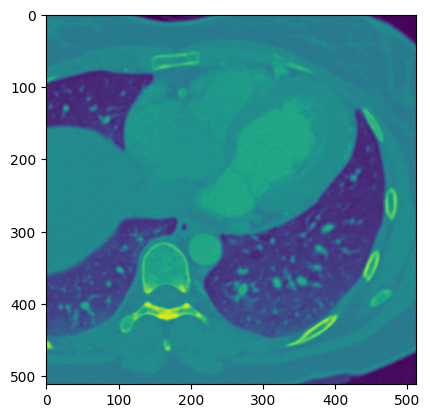

In [41]:
vol_image = sitk.GetArrayFromImage(sitk.ReadImage('data/VHSCDD_512/test_images/0001.nii.gz'))
my_image = vol_image[152]
plt.imshow(my_image)

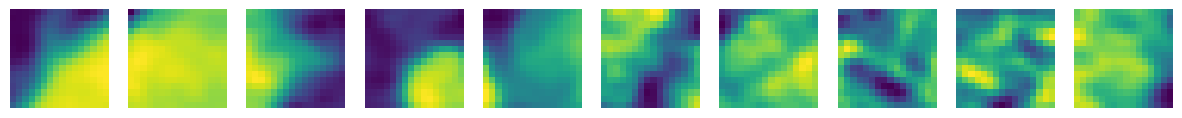

In [69]:
patch_size = 16
patches = []

for i in range(0, my_image.shape[0], patch_size):
    for j in range(0, my_image.shape[1], patch_size):
        patch = my_image[i:i+patch_size, j:j+patch_size]
        patches.append(patch)

start = 200
end = 210
num_patches = end - start
fig, axes = plt.subplots(1, num_patches, figsize=(15, 3))

for i in range(num_patches):
    axes[i].imshow(patches[start + i])
    axes[i].axis('off')

plt.show()

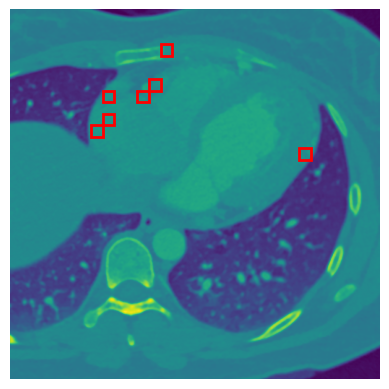

In [198]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming patch_indices is a list of patch indices you want to visualize
patch_indices = [109, 204, 235, 409, 232, 296, 327]

# Plot the original image
plt.imshow(my_image)  # Ensure cmap='gray' for grayscale images

# Loop through each patch index
for patch_index in patch_indices:
    # Calculate patch position
    patch_row = patch_index // (my_image.shape[1] // patch_size)
    patch_col = patch_index % (my_image.shape[1] // patch_size)
    
    # Calculate the coordinates of the bounding box
    bbox_x = patch_col * patch_size
    bbox_y = patch_row * patch_size
    bbox_width = patch_size
    bbox_height = patch_size

    # Draw the bounding box
    rect = patches.Rectangle((bbox_x, bbox_y), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()


### Interaction between attention weights, context matrices, rot weights after each layers in Multihead Self Attention Mechanism

In [29]:
def show(title, matrix):
    plt.title(title)
    plt.imshow(matrix)
    plt.colorbar()

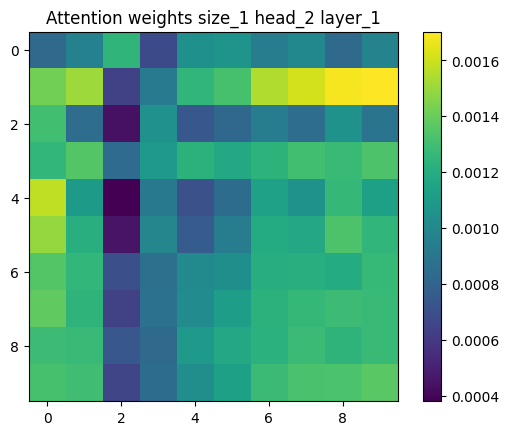

In [184]:
a_size1_head2 = sitk.GetArrayFromImage(sitk.ReadImage('outputs/RotCAtt_TransUNet_plusplus/VHSCDD_RotCAtt_TransUNet_plusplus_bs5_ps16_epo600_hw512_layer3/test/1/a_size_1_head_2.nii.gz'))
show(
    'Attention weights size_1 head_2 layer_1',
    a_size1_head2[0][200:210, 200:210]
)

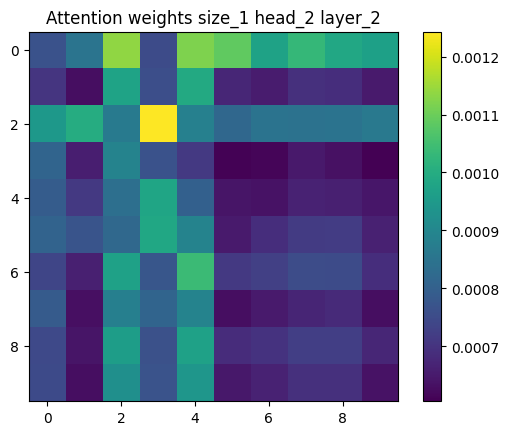

In [186]:
show(
    'Attention weights size_1 head_2 layer_2',
    a_size1_head2[1][200:210, 200:210]
)

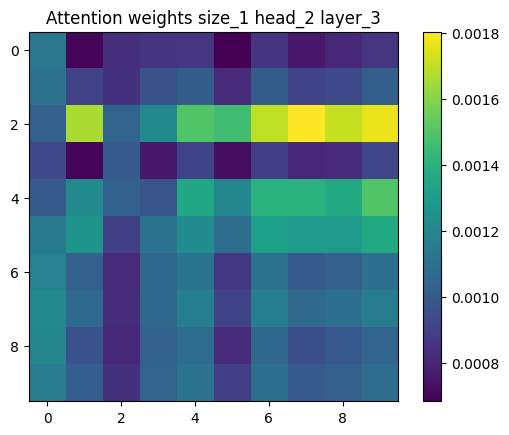

In [187]:
show(
    'Attention weights size_1 head_2 layer_3',
    a_size1_head2[2][200:210, 200:210]
)

In [196]:
a_size1_head2_layer2 = a_size1_head2[2]
indices = np.where(a_size1_head2_layer2 >= 0.0018)
indices[0][500:600]

array([76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78,
       78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81,
       81, 81, 81, 81, 81, 82, 82, 82, 83, 83, 83, 84, 84, 85, 85],
      dtype=int64)

In [197]:
row_indices = indices[0]
col_indices = indices[1]
filtered_indices = col_indices[row_indices == 82]
filtered_indices

array([232, 296, 327], dtype=int64)

In [17]:
n_heads = 4
def _decompose(x):
    x = torch.tensor(x)
    new_shape = x.size()[:-1] + (n_heads, x.shape[2] // n_heads)
    x = x.view(*new_shape)
    x = x.permute(0, 2, 1, 3)
    return x.detach().cpu().numpy()

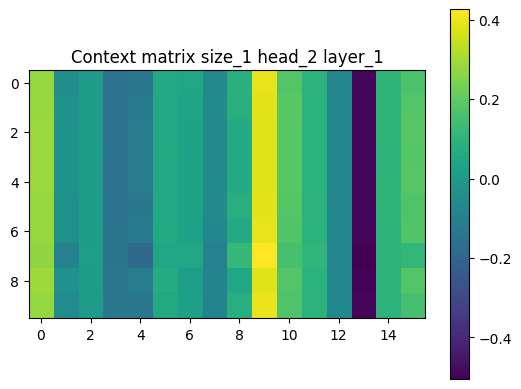

In [212]:
C_size1 = sitk.GetArrayFromImage(sitk.ReadImage('outputs/RotCAtt_TransUNet_plusplus/VHSCDD_RotCAtt_TransUNet_plusplus_bs5_ps16_epo600_hw512_layer3/test/1/c_size_1.nii.gz'))
de_C_size1 = _decompose(C_size1)

show(
    'Context matrix size_1 head_1 layer_1',
    de_C_size1[0][0][:10]
)

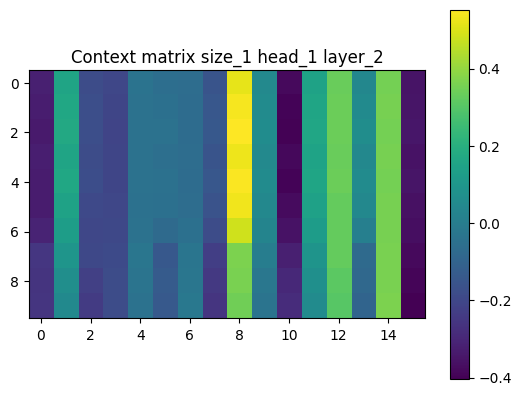

In [213]:
show(
    'Context matrix size_1 head_1 layer_2',
    de_C_size1[1][0][:10]
)

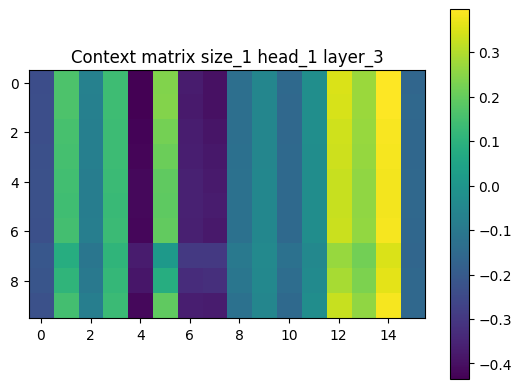

In [214]:
show(
    'Context matrix size_1 head_1 layer_3',
    de_C_size1[2][0][:10]
)

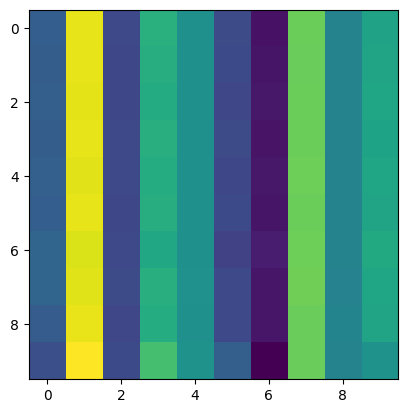

In [217]:
plt.imshow(C_size1[2][20:30, 20:30])

In [206]:
path = 'outputs/RotCAtt_TransUNet_plusplus/VHSCDD_RotCAtt_TransUNet_plusplus_bs5_ps16_epo600_hw512_layer3/test/1/r_size_1.nii.gz'
r_size1 = sitk.GetArrayFromImage(sitk.ReadImage(path))
r_size1.shape

(1, 1, 64)

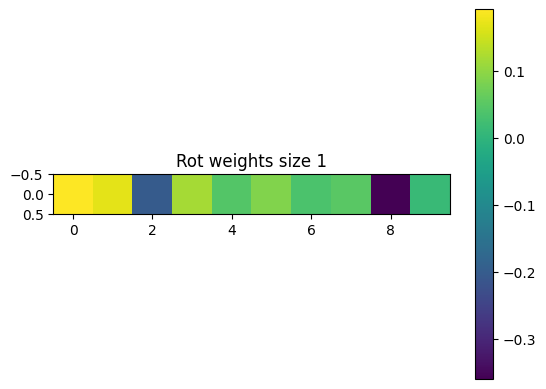

In [211]:
show(
    'Rot weights size 1',
    r_size1[0][:, 20:30]
)

In [218]:
C_size1[2].shape

(1024, 64)

In [219]:
f1 = r_size1[0] + C_size1[2]
f1.shape

(1024, 64)

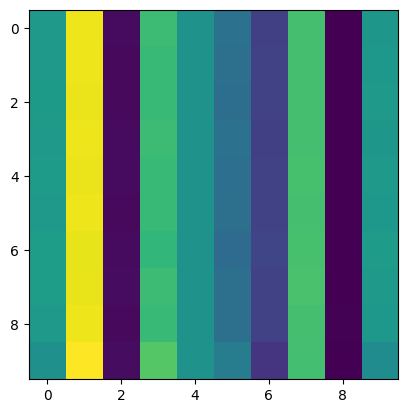

In [220]:
plt.imshow(f1[20:30, 20:30])